In [1]:
NET = 'dilation'

import tensorflow as tf
import datasets
import pickle
import os
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import pickle

sns.set_style("white")
sns.set_context("poster")

if NET == 'dilation':
    import experiments.dilation as experiments
if NET == 'segnet':
    import experiments.segnet as experiments
elif NET == 'lstm':
    import experiments.lstm as experiments
elif NET == 'coloring':
    import experiments.coloring as experiments
elif NET == 'crossing':
    import experiments.crossing as experiments
elif NET == 'unet':
    import experiments.unet as experiments
elif NET == 'multi_lstm':
    import experiments.multi_lstm as experiments
elif NET == 'multi_lstm_init':
    import experiments.multi_lstm_init as experiments
elif NET == 'FF':
    import experiments.FF as experiments
elif NET == 'optimal_lstm':
    import experiments.optimal_lstm as experiments
elif NET == 'lstm3':
    import experiments.LSTM3 as experiments


        

        id: 0,
        name: DATA_CatNS0_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS0'],
        

        

        id: 1,
        name: DATA_CatNS2_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS2'],
        

        

        id: 2,
        name: DATA_CatNS4_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS4'],
        

        

        id: 3,
        name: DATA_CatNS6_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NS6'],
        

        

        id: 4,
        name: DATA_CatNSd4_D0,
        dataset_path: ,
        num_images_training: 1000.0,
        num_images_testing: 10000.0,
        type: ['NSd4'],
        

        

        id: 5,
        name: DATA_CatS0_D0,
        datas

In [2]:
output_path = '/om/user/shobhita/data/symmetry/' + NET + '/'
network_id = 54 #specific ID we want to get activations for
run_opt = experiments.get_best_of_the_family(output_path, network_id)
opt_datasets = datasets.get_datasets(output_path)

In [3]:
import gc
gc.collect()

0

In [4]:
data_points = []
datasets = [opt_datasets[45]]
for opt_data in datasets:
    with open(run_opt.log_dir_base + run_opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
        data_point = pickle.load(f)
        data_points.append(data_point)

    print('--------------------')
    print(run_opt.name)
    print(opt_data.log_name)

--------------------
ID54_Dilation_D32
ID45_DATA_Catflank1S_D2


In [5]:
len(data_point[0][0][-1][0][0])

IndexError: invalid index to scalar variable.

In [29]:
i=0
j=0
data_point[i][0][-3][j].shape

(20, 20, 64)

In [26]:
"""
dim 1 (data_point[0:10]) = 10: 10 iterations
dim 2 (data_point[0:10][0:5]) = 5: [activations, image, y_, preds, correct_prediction]
dim 3 - activations (data_point[0:10][0][0:6]) = 6: [act_state1, act_state2, act_state3, out_1, out_2, out_3]
dim 4 - activations (data_point[0:10][0][0:6][0:50]) = 50: unrolling steps
dim 5 - act1, act2, act3 (data_point[0:10][0][0:2][0:50][0:2]) = 2: LSTM State tuple 
dim 5 - out1, out2, out3 (data_point[0:10][0][3:5][0:50][0:32]) = 32: images(?)
"""
#Example
rsapath = "/om/user/shobhita/data/symmetry/lstm3/"
filename = "activation_rsa_ID20_DATA_CatNS0_D2.pkl"
f = pickle.load(open(rsapath + filename, "rb"))
len(f)

0

In [24]:
f.shape

(0,)

In [ ]:
# ViEW FULL ACTIVATION MAPS

plt.rcParams.update({'font.size': 13})

for data_point in data_points:
#     plt.imshow(np.squeeze(-data_point[0][1][1]), cmap='gray')
    print("Predictions: ", data_point[0][3])
    for channel in range(0,60, 10):
        for num_image in range(31, 32):
            fig = plt.figure(figsize=(10, 10.5))
            columns = 10
            rows=11
            plt.subplots_adjust(wspace=0.05, hspace=0)    


            ax = []

            #BATCH, SAVE, LAYER, TIME, C/H
            im_count = 1
            for k in range(0,50,5):#,columns*(rows-1)):
                # k = num iterations
    #             print(im_count)
                # OUTPUT THIRD LAYER
                ax.append( fig.add_subplot(rows, columns, im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][5][k][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$O^{(3)}$' )
                    plt.tick_params(labelsize=18)
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])

                #HIDDEN THIRD LAYER
                ax.append( fig.add_subplot(rows, columns, 1*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][2][k][1][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$H^{(3)}$')
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])

                #C THIRD LAYER
                ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][2][k][0][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$C^{(3)}$')
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])

                #OUTPUT SECOND LAYER
                ax.append( fig.add_subplot(rows, columns, 3*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][4][k][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$O^{(2)}$' )
                    plt.tick_params(labelsize=18)
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])

                #HIDDEN SECOND LAYER
                ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][1][k][1][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$H^{(2)}$')
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])

                ''' 
                ax.append( fig.add_subplot(rows, columns, 2*columns+im_count) )
                plt.imshow(np.squeeze(data_point[0][0][1][k][1][num_image,:,:,1]), cmap='gray') #15:45
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])
                '''

                #C SECOND LAYER
                ax.append( fig.add_subplot(rows, columns, 5*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][1][k][0][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$C^{(2)}$')
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])
                ''' 
                ax.append( fig.add_subplot(rows, columns, 4*columns+im_count) )
                plt.imshow(np.squeeze(data_point[0][0][1][k][0][num_image,:,:,1]), cmap='gray') #15:45
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])
                ''' 
                #OUTPUT FIRST LAYER
                ax.append( fig.add_subplot(rows, columns, 6*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][3][k][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$O^{(1)}$' )
                    plt.tick_params(labelsize=18)
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])

                 #HIDDEN - FIRST LAYER
                ax.append( fig.add_subplot(rows, columns, 7*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][0][k][1][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$H^{(1)}$')
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])

                #C - FIRST LAYER
                ax.append( fig.add_subplot(rows, columns, 8*columns+im_count) )
                plt.imshow(np.squeeze(-data_point[0][0][0][k][0][num_image,:,:,channel]), cmap='gray') #15:45
                if k==0:
                    plt.ylabel('$C^{(1)}$')
                ax[-1].get_xaxis().set_ticks([])
                ax[-1].get_yaxis().set_ticks([])


        #         for kk in range(2):
        #             #OUTPUT FIRST LAYER
        #             ax.append( fig.add_subplot(rows, columns, (kk+5)*columns+im_count) )
        #             plt.imshow(np.squeeze(-data_point[0][0][2][k][num_image,:,:,2*kk]), cmap='gray') #15:45
        #             if k==0:
        #                 plt.ylabel('$O^{(1)}$ ex.'+ str(kk) )
        #             ax[-1].get_xaxis().set_ticks([])
        #             ax[-1].get_yaxis().set_ticks([])

                im_count+=1

In [ ]:
# VIEW MEANS/STD DEVS
results = pickle.load(open('/om/user/shobhita/data/symmetry/lstm3/activation_results.pkl', "rb"))

In [3]:
output_means = results["means"]
output_stds = results["stds"]

def get_reference(midline):
    reference1 = np.full((20,20),0)
    reference1[:,midline] = 1
    return reference1

def get_dist(im, reference):
    im_norm = (im - im.min()) / (im.max()-im.min())
    return np.linalg.norm(im_norm-reference)

def get_channel_dist(channel, references):
    symm = min([get_dist(output_means[channel][0],r) for r in references])
    nonsymm = min([get_dist(output_means[channel][1],r) for r in references])
    return symm, nonsymm

references = [get_reference([i]) for i in range(9,12)] + [get_reference([9,10,11])]

NameError: name 'results' is not defined

In [27]:
plt.imshow(output_means[12][0])

In [ ]:
plt.imshow(output_means[12][1])

In [5]:
def get_v_range(centers):
    vmax = float("-inf")
    vmin = float("inf")
    for im in centers:
        vmax = max(vmax, max(im))
        vmin = min(vmin, min(im))
    return vmin, vmax
    
def get_full_v_range(centers_list):
    vmax = float("-inf")
    vmin = float("inf")
    for centers in centers_list:
        vmin_s, vmax_s = get_v_range(centers_s)
        vmax = max(vmax, vmax_s)
        vmin = min(vmin, vmin_s)
    return vmin, vmax

def view_centroids(centers, vmin=None, vmax=None, title=""):
    fig = plt.figure(figsize=(10,5))
    columns = 5
    rows = 2
    im_count=1
    plt.subplots_adjust(wspace=0.05,hspace=0)
    axs = []
    for centroid in range(10):
        axs.append(fig.add_subplot(rows,columns, im_count))
        sns.heatmap(centers[centroid].reshape((20,20)), vmax=vmax, vmin=vmin)
        axs[-1].get_xaxis().set_ticks([])
        axs[-1].get_yaxis().set_ticks([])
        im_count+=1
    fig.suptitle(title, fontsize=13)

In [7]:
# CLUSTERING FIGURES

sd = 28
nsd = 23
clustering_s = pickle.load(open('/om/user/shobhita/data/symmetry/lstm3/activation_clusters/activation_clusters_km_10_timestep_49_S_d{}.pkl'.format(sd), "rb"))
centers_s = clustering_s["centroids"]
centers_s[[3, 4]] = centers_s[[4, 3]]
centers_s[[8, 9]] = centers_s[[9, 8]]
df = clustering_s["data"]
df["label"] = clustering_s["labels"]

clustering_as = pickle.load(open('/om/user/shobhita/data/symmetry/lstm3/activation_clusters/activation_clusters_km_10_timestep_49_NS_d{}.pkl'.format(nsd), "rb"))
centers_as = clustering_as["centroids"]
df_as = clustering_as["data"]
df_as["label"] = clustering_as["labels"]

vmin, vmax = get_full_v_range([centers_s, centers_as])
# vmin, vmax = None, None 
# vmin, vmax = -1, 1

DATASET 28


Text(0.5, 0.98, 'Output Activations for Symmetric with Bandsize 6')

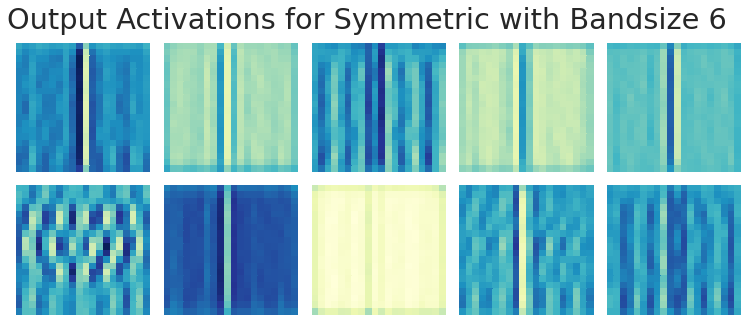

In [11]:
print("DATASET {}".format(sd))

fig = plt.figure(figsize=(13,5))
columns = 5
rows = 2
im_count=1
plt.subplots_adjust(wspace=0.1,hspace=0.1)
axs = []
for centroid in range(10):
    axs.append(fig.add_subplot(rows,columns, im_count))
    sns.heatmap(centers_s[centroid].reshape((20,20)), vmax=vmax, vmin=vmin, cbar=False, cmap="YlGnBu")
    axs[-1].get_xaxis().set_ticks([])
    axs[-1].get_yaxis().set_ticks([])
    im_count+=1
fig.suptitle("Output Activations for Symmetric with Bandsize 6")

# view_centroids(centers_s, vmin, vmax)
# Centroids for symmetric samples

DATASET 28


Text(0.5, 0.98, 'Output Activations for Symmetric with Bandsize 6')

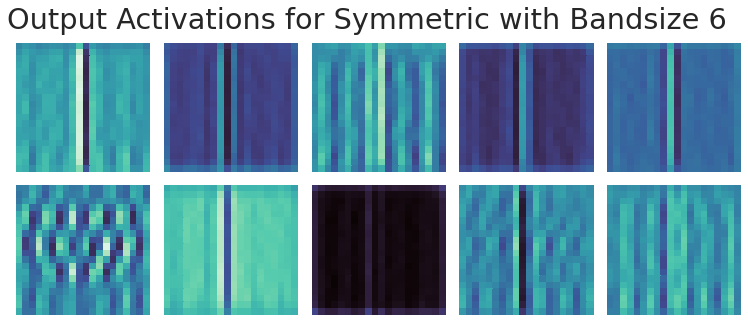

In [14]:
print("DATASET {}".format(sd))

fig = plt.figure(figsize=(13,5))
columns = 5
rows = 2
im_count=1
plt.subplots_adjust(wspace=0.1,hspace=0.1)
axs = []
for centroid in range(10):
    axs.append(fig.add_subplot(rows,columns, im_count))
    sns.heatmap(centers_s[centroid].reshape((20,20)), vmax=vmax, vmin=vmin, cbar=False, cmap="mako")
    axs[-1].get_xaxis().set_ticks([])
    axs[-1].get_yaxis().set_ticks([])
    im_count+=1
fig.suptitle("Output Activations for Symmetric with Bandsize 6")

# view_centroids(centers_s, vmin, vmax)
# Centroids for symmetric samples

DATASET 28


Text(0.5, 0.98, 'Output Activations for Non-symmetric with Bandsize 6')

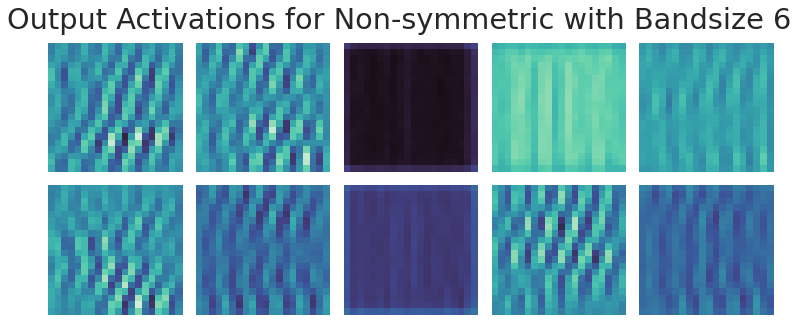

In [15]:
print("DATASET {}".format(sd))

fig = plt.figure(figsize=(13,5))
columns = 5
rows = 2
im_count=1
plt.subplots_adjust(wspace=0.1,hspace=0.1)
axs = []
for centroid in range(10):
    axs.append(fig.add_subplot(rows,columns, im_count))
    sns.heatmap(centers_as[centroid].reshape((20,20)), vmax=vmax, vmin=vmin, cbar=False, cmap="mako")
    axs[-1].get_xaxis().set_ticks([])
    axs[-1].get_yaxis().set_ticks([])
    im_count+=1
fig.suptitle("Output Activations for Non-symmetric with Bandsize 6")

# view_centroids(centers_s, vmin, vmax)
# Centroids for symmetric samples

DATASET 23


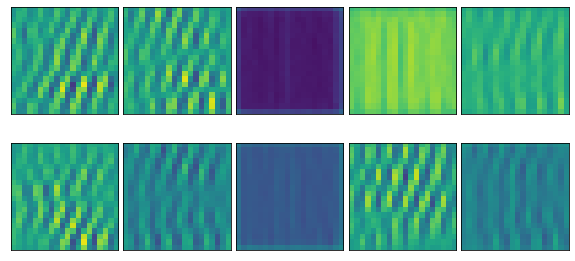

In [8]:
print("DATASET {}".format(nsd))
view_centroids(centers_as, vmin, vmax)
# Centroids for nonsymmetric samples

In [41]:
vmax

0.8445891

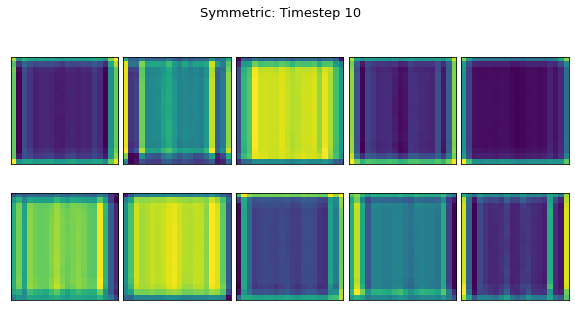

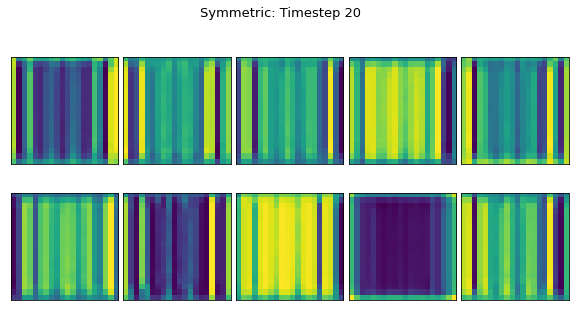

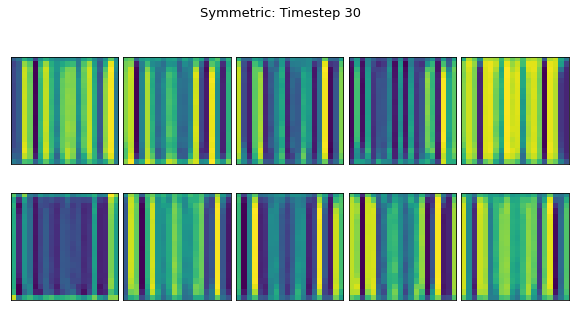

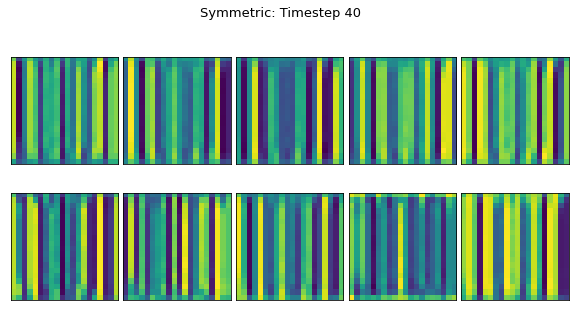

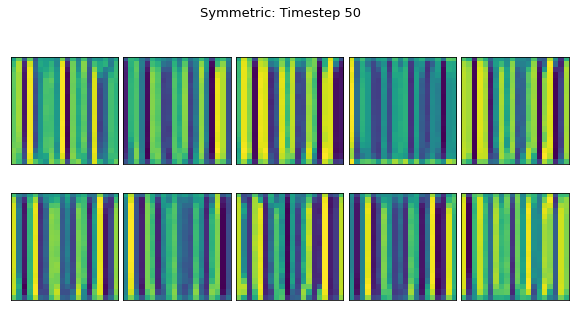

In [28]:
# TIME STEP FIGURES - SYMMETRIC - 87
n=10
idx="S"
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters_km_{}_timestep_{}_{}.pkl".format(n, ts, idx), "rb"))
    centers = clusters["centroids"]
    view_centroids(centers, title="Symmetric: Timestep {}".format(ts+1))

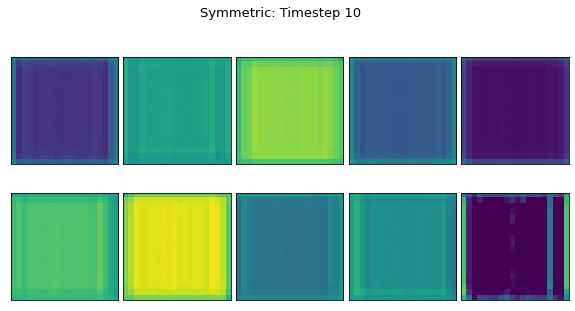

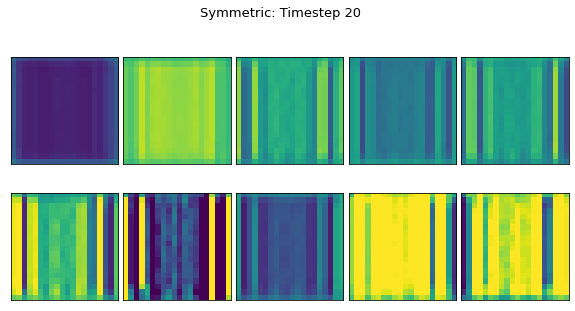

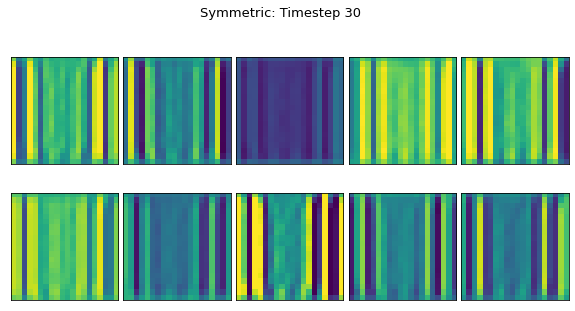

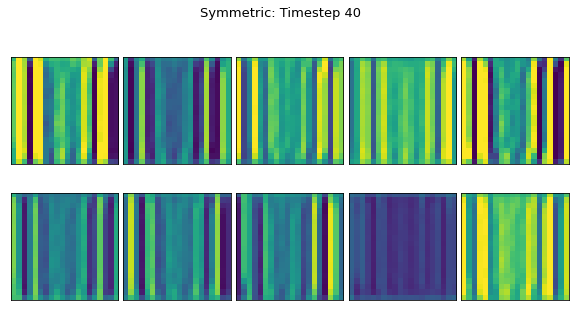

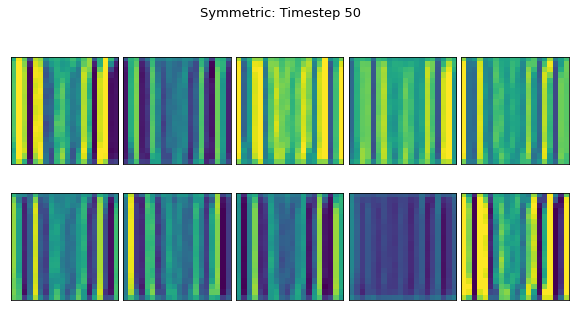

In [30]:
# TIME STEP FIGURES - NONSYMMETRIC - 92
n=10
idx="NS"
maps = []
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters/activation_clusters_km_{}_timestep_{}_{}_d{}.pkl".format(n, ts, idx, 92), "rb"))
    centers = clusters["centroids"]
    maps.append(centers)
    
vmin, vmax = get_full_v_range(maps)

for i, ts in enumerate([9,19,29,39,49]):
    view_centroids(maps[i], vmin, vmax, title="Symmetric: Timestep {}".format(ts+1))

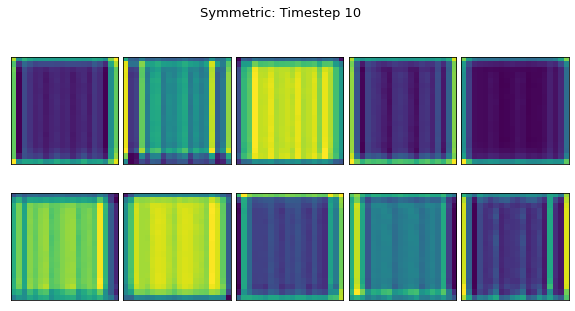

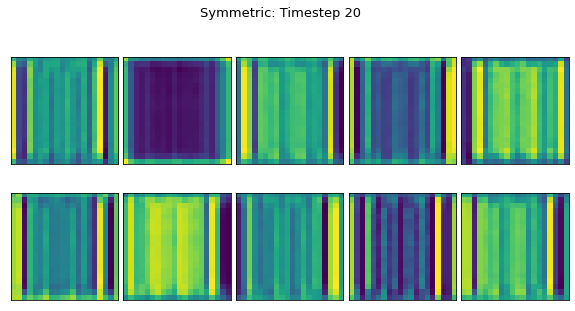

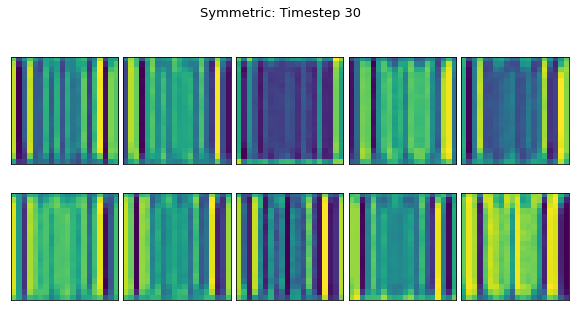

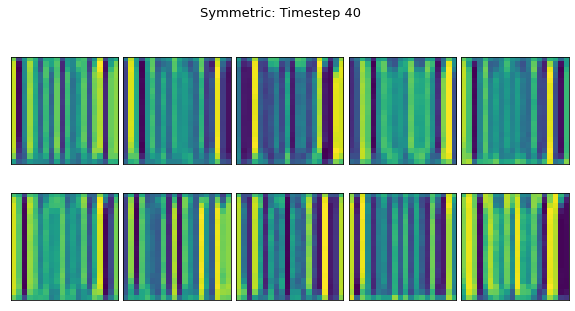

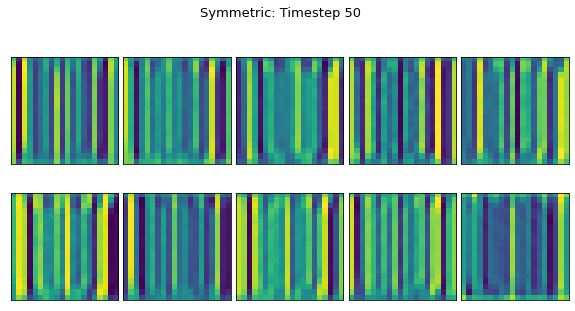

In [26]:
# TIME STEP FIGURES - SYMMETRIC - 86
n=10
idx="S"
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters_km_{}_timestep_{}_{}.pkl".format(n, ts, idx), "rb"))
    centers = clusters["centroids"]
    view_centroids(centers, title="Symmetric: Timestep {}".format(ts+1))

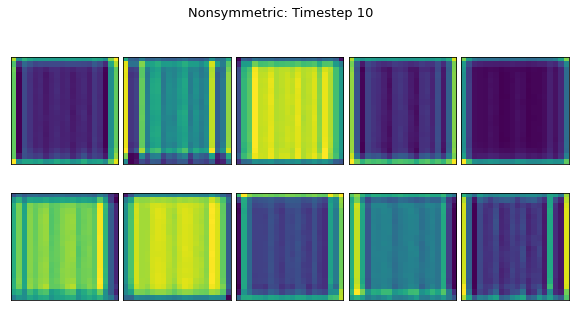

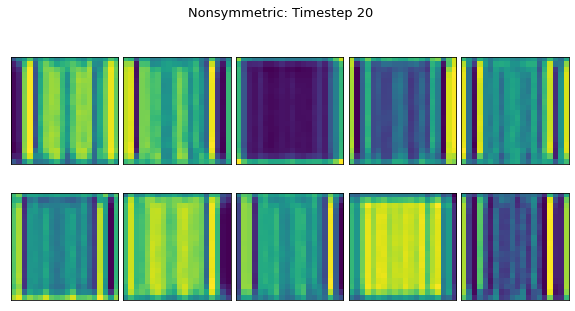

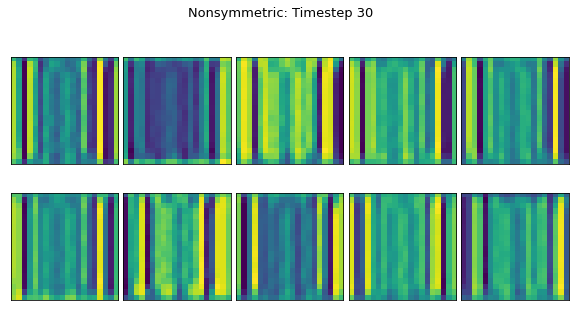

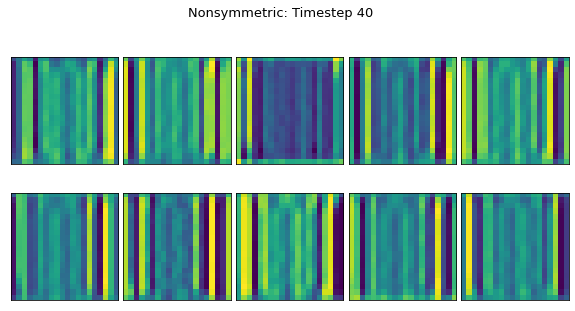

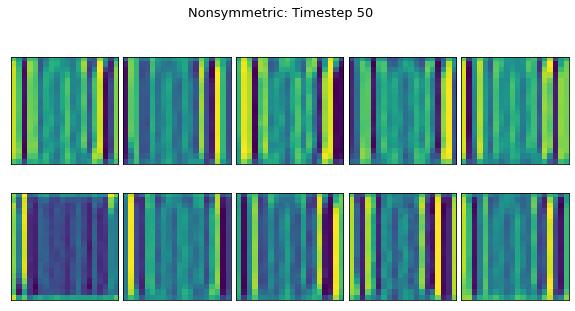

In [27]:
# TIME STEP FIGURES - NONSYMMETRIC - 91
n=10
idx="NS"
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters_km_{}_timestep_{}_{}.pkl".format(n, ts, idx), "rb"))
    centers = clusters["centroids"]
    view_centroids(centers, title="Nonsymmetric: Timestep {}".format(ts+1))

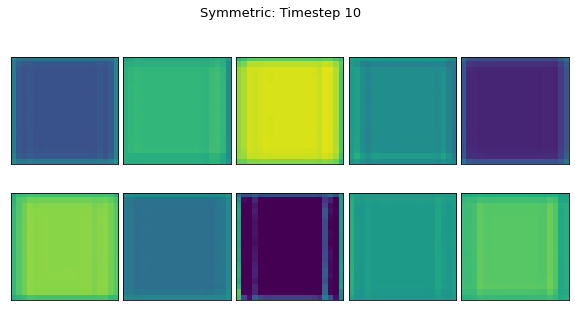

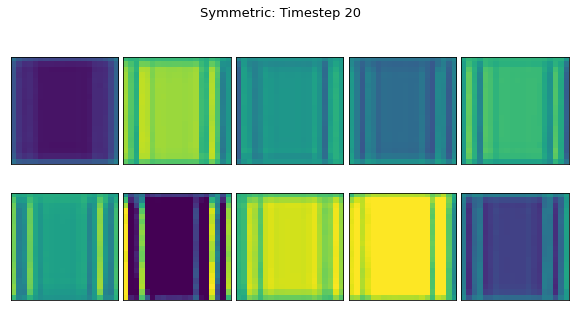

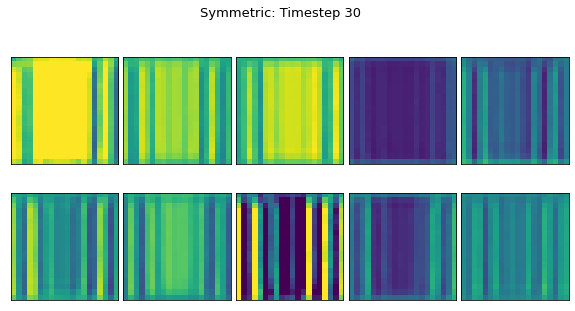

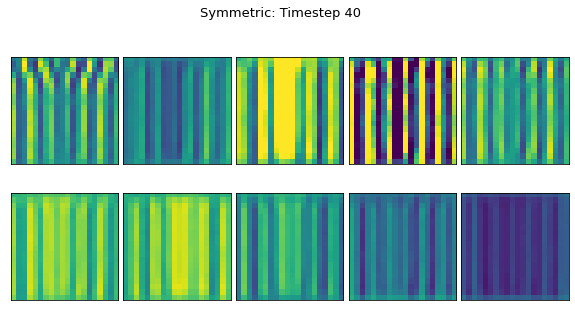

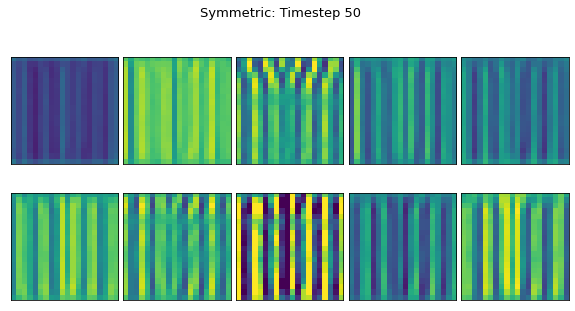

In [27]:
# TIME STEP FIGURES - SYMMETRIC - 83
n=10
idx="S"
maps = []
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters/activation_clusters_km_{}_timestep_{}_{}_d{}.pkl".format(n, ts, idx, 83), "rb"))
    centers = clusters["centroids"]
    maps.append(centers)
vmin, vmax = get_full_v_range(maps)

for i, ts in enumerate([9,19,29,39,49]):
    view_centroids(maps[i], vmin, vmax, title="Symmetric: Timestep {}".format(ts+1))
# df = clusters["data"]
# df["label"] = clusters["labels"]
# print(df["label"].value_counts())

In [26]:
for i, j in enumerate(["a", "b", "c"]):
    print(i, j)

0 a
1 b
2 c


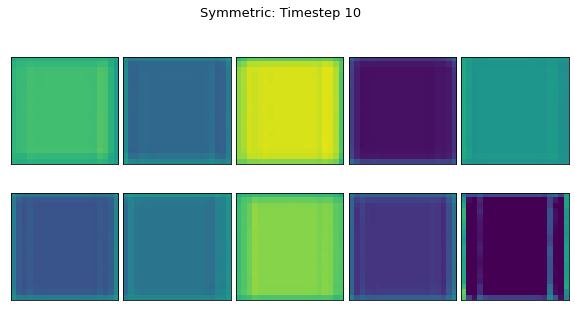

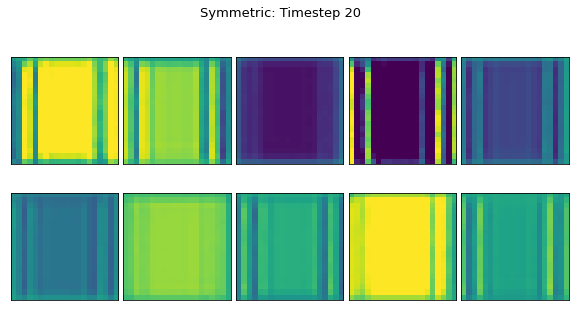

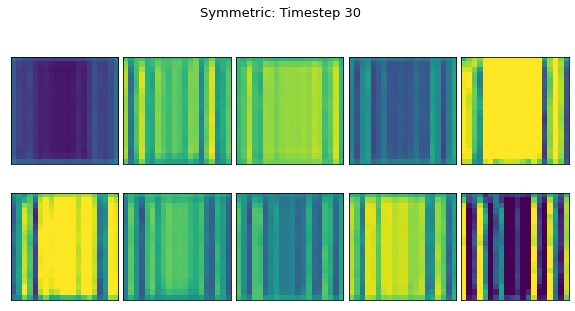

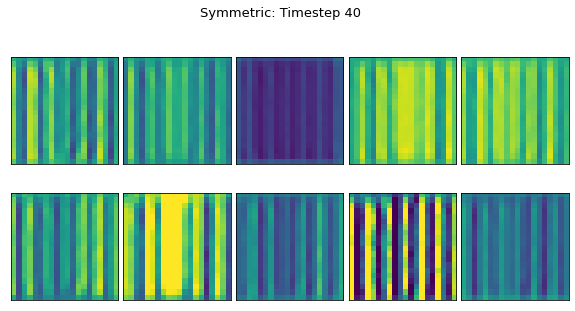

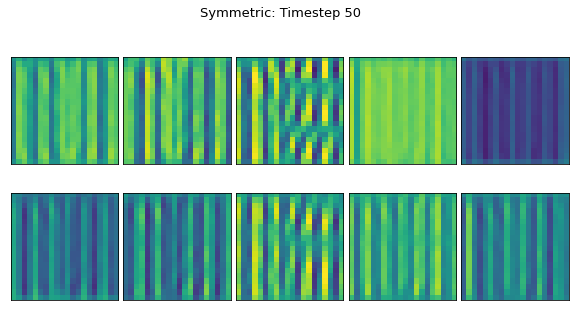

In [29]:
# TIME STEP FIGURES - NONSYMMETRIC - 88
n=10
idx="NS"
maps = []
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters/activation_clusters_km_{}_timestep_{}_{}_d{}.pkl".format(n, ts, idx, 88), "rb"))
    centers = clusters["centroids"]
    maps.append(centers)
    
vmin, vmax = get_full_v_range(maps)

for i, ts in enumerate([9,19,29,39,49]):
    view_centroids(maps[i], vmin, vmax, title="Symmetric: Timestep {}".format(ts+1))

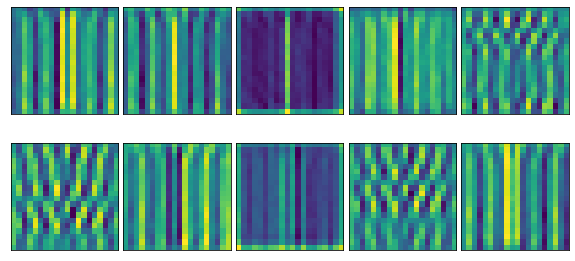

In [7]:
# TIME STEP FIGURES - SYMMETRIC - 49
n=10
idx="S"
ts=49
# for ts in [9,19,29,39,49]:
clusters = pickle.load(open(output_path+"activation_clusters_km_{}_timestep_{}_{}.pkl".format(n, ts, idx), "rb"))
centers = clusters["centroids"]
view_centroids(centers)


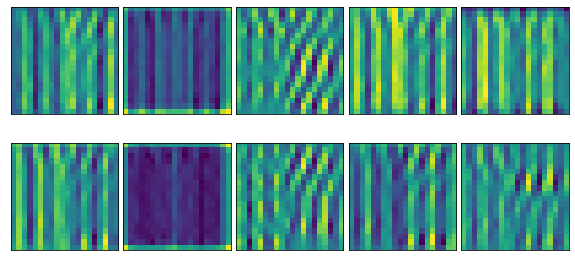

In [10]:
# TIME STEP FIGURES - NONSYMMETRIC - 50
n=10
idx="NS"
ts=49
# for ts in [9,19,29,39,49]:
clusters = pickle.load(open(output_path+"activation_clusters_km_{}_timestep_{}_{}.pkl".format(n, ts, idx), "rb"))
centers = clusters["centroids"]
view_centroids(centers)

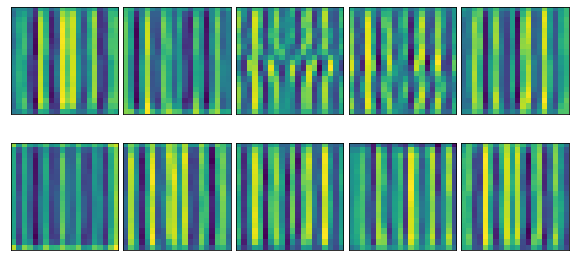

In [11]:
# TIME STEP FIGURES - SYMMETRIC - 45
n=10
idx="S"
ts=49
# for ts in [9,19,29,39,49]:
clusters = pickle.load(open(output_path+"activation_clusters_km_{}_timestep_{}_{}.pkl".format(n, ts, idx), "rb"))
centers = clusters["centroids"]
view_centroids(centers)

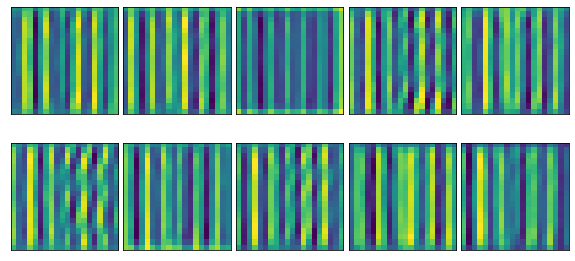

In [12]:
# TIME STEP FIGURES - NONSYMMETRIC - 46
n=10
idx="NS"
ts=49
# for ts in [9,19,29,39,49]:
clusters = pickle.load(open(output_path+"activation_clusters_km_{}_timestep_{}_{}.pkl".format(n, ts, idx), "rb"))
centers = clusters["centroids"]
view_centroids(centers)

<Figure size 2808x360 with 0 Axes>

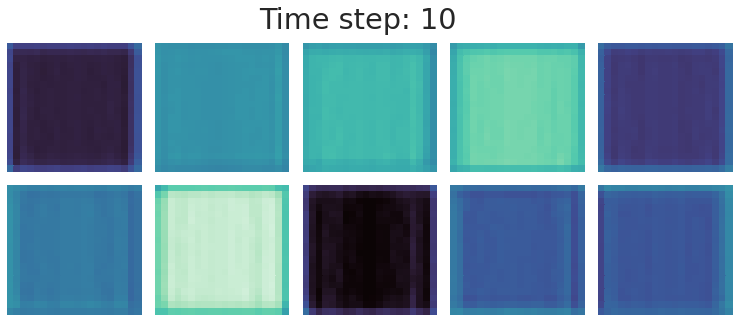

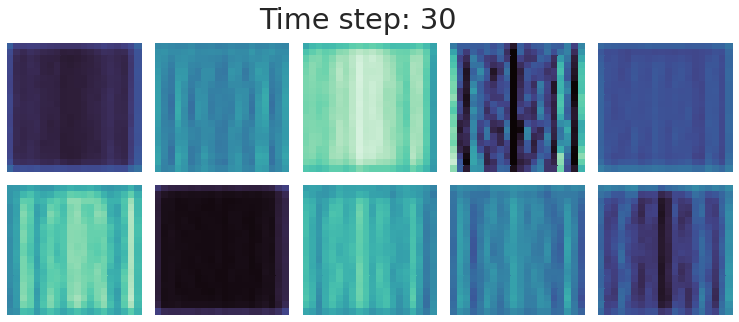

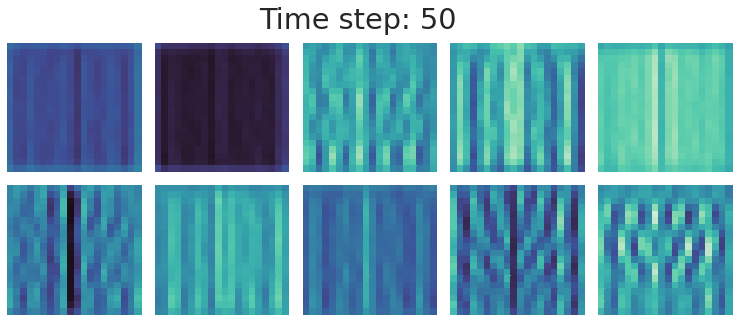

In [8]:
# TIME STEP FIGURES - SYMMETRIC - 28
n=10
idx="S"
maps = []
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters/activation_clusters_km_{}_timestep_{}_{}_d{}.pkl".format(n, ts, idx, 28), "rb"))
    centers = clusters["centroids"]
    maps.append(centers)
    
vmin, vmax = get_full_v_range(maps)

fig = plt.figure(figsize=(39,5))
columns = 3
# rows = 2
im_count=1
plt.subplots_adjust(wspace=0.1,hspace=0.1)
axs2 = []

for i, ts in enumerate([9, 29, 49]):
    fig = plt.figure(figsize=(13,5))
    columns = 5
    rows = 2
    im_count=1
    plt.subplots_adjust(wspace=0.1,hspace=0.1)
    axs = []
    for centroid in range(10):
        axs.append(fig.add_subplot(rows,columns, im_count))
        sns.heatmap(maps[i][centroid].reshape((20,20)), vmax=vmax, vmin=vmin, cbar=False, cmap="mako")
        axs[-1].get_xaxis().set_ticks([])
        axs[-1].get_yaxis().set_ticks([])
        im_count+=1
    fig.suptitle("Time step: {}".format(ts+1))

<Figure size 2808x360 with 0 Axes>

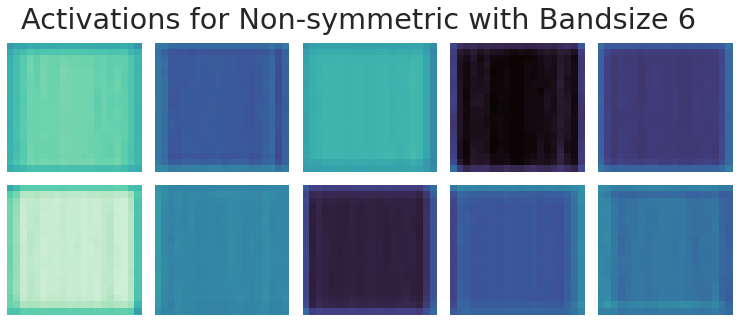

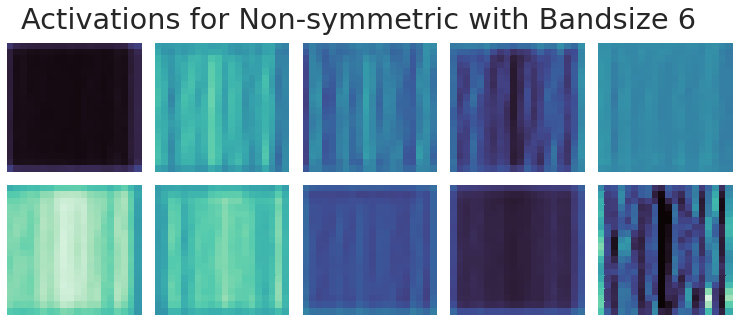

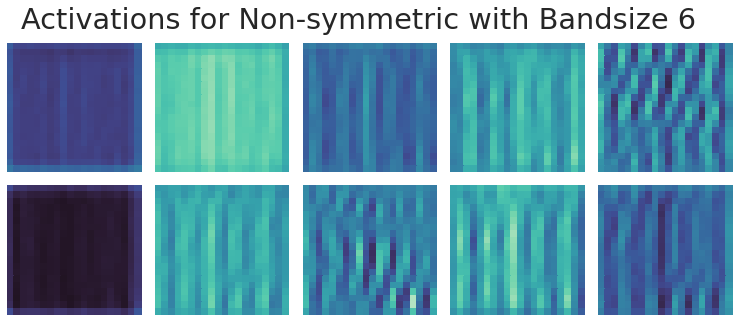

In [26]:
# TIME STEP FIGURES - NONSYMMETRIC - 23
n=10
idx="NS"
maps = []
for ts in [9,19,29,39,49]:
    clusters = pickle.load(open(output_path+"activation_clusters/activation_clusters_km_{}_timestep_{}_{}_d{}.pkl".format(n, ts, idx, 23), "rb"))
    centers = clusters["centroids"]
    maps.append(centers)
    
vmin, vmax = get_full_v_range(maps)

fig = plt.figure(figsize=(39,5))
columns = 3
# rows = 2
im_count=1
plt.subplots_adjust(wspace=0.1,hspace=0.1)
axs2 = []

for i, ts in enumerate([9, 29, 49]):
    fig = plt.figure(figsize=(13,5))
    columns = 5
    rows = 2
    im_count=1
    plt.subplots_adjust(wspace=0.1,hspace=0.1)
    axs = []
    for centroid in range(10):
        axs.append(fig.add_subplot(rows,columns, im_count))
        sns.heatmap(maps[i][centroid].reshape((20,20)), vmax=vmax, vmin=vmin, cbar=False, cmap="mako")
        axs[-1].get_xaxis().set_ticks([])
        axs[-1].get_yaxis().set_ticks([])
        im_count+=1
    fig.suptitle("Activations for Non-symmetric with Bandsize 6")

In [10]:
data_points = []
datasets = [opt_datasets[45]]
for opt_data in datasets:
    with open(run_opt.log_dir_base + run_opt.name + '/results/activations_DATA' + opt_data.log_name + '.pkl', 'rb') as f:
        data_point = pickle.load(f)
        data_points.append(data_point)

    print('--------------------')
    print(run_opt.name)
    print(opt_data.log_name)

--------------------
ID90_LSTM3_D32
ID45_DATA_Catflank1S_D2


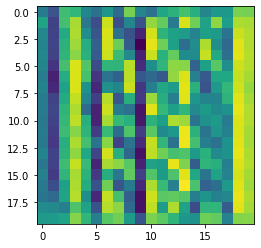

In [9]:
plt.imshow(data_points[0][0][0][5][49][13,:,:,0])

In [22]:
len(data_points[0][0][0][5])

50

In [15]:
fs = pickle.load(open("/om/user/shobhita/data/symmetry/lstm3/activation_clusters_kmeans_10.pkl", "rb"))
fns = pickle.load(open("/om/user/shobhita/data/symmetry/lstm3/activation_clusters_kmeans_10_asymmetric.pkl", "rb"))

In [16]:
centers = fs["centroids"]
centerns = fns["centroids"]
vmin, vmax = get_full_v_range(centers, centerns)

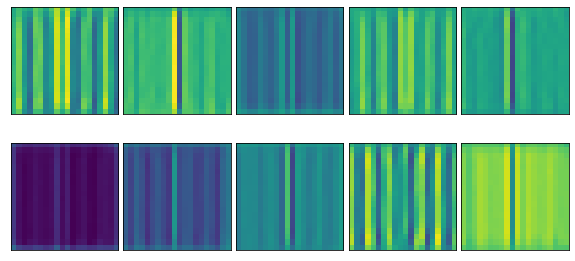

In [19]:
view_centroids(centers, vmin, vmax)

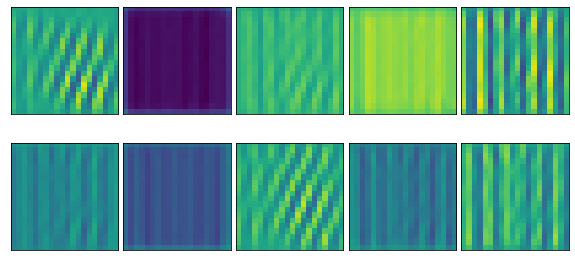

In [20]:
view_centroids(centerns, vmin, vmax)

In [155]:
import pandas as pd
import seaborn as sns
channel_distance_distributions = []
for channel in range(64):
    channel_distance_distributions.append(get_channel_dist(channel, references)[0])
    
symm_dists = pd.DataFrame()
symm_dists["data"] = channel_distance_distributions
symm_dists["idx"] = "s"

In [156]:
import pandas as pd
import seaborn as sns
channel_distance_distributions1 = []
for channel in range(64):
    channel_distance_distributions1.append(get_channel_dist(channel, references)[1])
ns_dists = pd.DataFrame()
ns_dists["data"] = channel_distance_distributions1
ns_dists["idx"] = "ns"

In [158]:

distributions = pd.concat([symm_dists, ns_dists])
distributions["all"] = ""

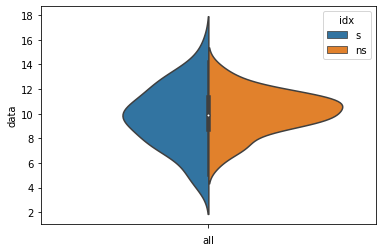

In [160]:
ax = sns.violinplot(x="all", y="data", hue="idx", data=distributions, split=True)
# ax.set_xlim(0,20)

In [3]:
ax = sns.violinplot(x=channel_distance_distributions1)
ax.set_xlim(0,20)

NameError: name 'sns' is not defined